In [2]:
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [12]:
image_path = Path("../Data/liver_tumor_segmentation/imagesTr")
label_path = Path("../Data/liver_tumor_segmentation/labelsTr")

In [13]:
def change_img_path_to_label_path(path):
    parts = list(path.parts)
    parts[parts.index("imagesTr")] = "labelsTr"
    return Path(*parts)


In [14]:
change_img_path_to_label_path(image_path)

PosixPath('../Data/liver_tumor_segmentation/labelsTr')

In [17]:
sample_path = list(image_path.glob("liver_*"))[0]
label_sample_path = change_img_path_to_label_path(sample_path)
sample_path, label_sample_path

(PosixPath('../Data/liver_tumor_segmentation/imagesTr/liver_88.nii.gz'),
 PosixPath('../Data/liver_tumor_segmentation/labelsTr/liver_88.nii.gz'))

In [19]:
image = nib.load(sample_path)
label = nib.load(label_sample_path)

image_data = image.get_fdata()
label_data = label.get_fdata()

image_data.shape, label_data.shape

((194, 194, 217), (194, 194, 217))

In [20]:
nib.aff2axcodes(image.affine), nib.aff2axcodes(label.affine)

(('R', 'A', 'S'), ('R', 'A', 'S'))

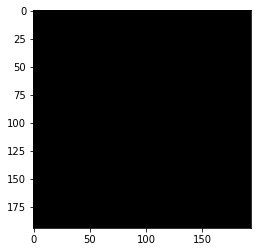

In [21]:
fig = plt.figure()
camera = Camera(fig)

for i in range(image_data.shape[2]):
    plt.imshow(image_data[:, :, i], cmap="gray")
    mask_ = np.ma.masked_where(label_data[:, :, i] == 0, label_data[:, :, i])
    plt.imshow(mask_, alpha=0.4)
    camera.snap()

animation = camera.animate()

In [22]:
HTML(animation.to_html5_video())